In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import numpy as np


Coluna	O que representa
Data	Mês de referência dos dados (formato YYYY-MM)
Produto	Tipo de produto financeiro (ex: Cartões, Empréstimos, etc.)
Receita_Realizada	Valor efetivamente obtido de receita naquele mês
Receita_Orcada	Valor planejado no orçamento para a receita desse produto naquele mês
Receita_Forecast	Revisão da receita esperada (forecast) com base em dados mais atualizados
Inadimplencia	Percentual (%) de inadimplência do produto no mês 
Margem	Receita líquida (lucro bruto aproximado), descontados custos diretos

In [15]:
df = pd.read_csv('C:/Python DSA/Case_vaga_BI/dados/dados_financeiros_36m.csv')
print (df.head(10))

      Data        Produto  Receita_Realizada  Receita_Orcada  \
0  2021-01        Cartões        15107074.90     14657349.20   
1  2021-01    Empréstimos        14392560.23     15848676.40   
2  2021-01  Investimentos         9739048.36      9422643.66   
3  2021-01        Seguros        18446380.49     18303038.91   
4  2021-01         Câmbio        17329236.01     15971967.55   
5  2021-02        Cartões         7099140.21      7007345.64   
6  2021-02    Empréstimos        14272038.82     12958947.47   
7  2021-02  Investimentos        11427776.11     10868028.06   
8  2021-02        Seguros        15552842.96     16461562.48   
9  2021-02         Câmbio        10327157.39     11097377.33   

   Receita_Forecast  Inadimplencia       Margem  
0       15967381.50           3.65   5182312.23  
1       15079486.76           3.10   4937503.94  
2        9817426.53           5.80   7651157.14  
3       17828133.26           0.63  13195717.57  
4       15812631.59           6.52   9336296.

In [34]:
# Criando métricas

#1. Calcula a margem percentual, quanto da receita realizada é lucro (margem/receita) em %, ajudando a entender a rentabilidade de cada produto.
df['margem_pct'] = df['Margem'] / df['Receita_Realizada'] * 100
#2. Calcula a variação percentual entre receita orçada e realizada, indicando o quão próximo o banco está de atingir suas metas.
df['Variacao_Orcado_Realizado_%'] = (df['Receita_Realizada'] - df['Receita_Orcada']) / df['Receita_Orcada'] * 100
# 3. Calcula a variação percentual entre receita forecast e realizada, indicando a precisão das previsões financeiras.
df['Acuracia_Forecast_%'] = 100 - abs((df['Receita_Realizada'] - df['Receita_Forecast']) / df['Receita_Realizada'] * 100)
# 4. Agregar receita mensal por produto
receita_mensal = df.groupby(['Data', 'Produto'])[['Receita_Orcada', 'Receita_Realizada', 'Receita_Forecast']].sum().reset_index()

SIMULANDO QUE O FOCO SEJA CARTÕES 

In [29]:
produto_foco = 'Cartões'
df_foco = df[df['Produto'] == produto_foco].copy()

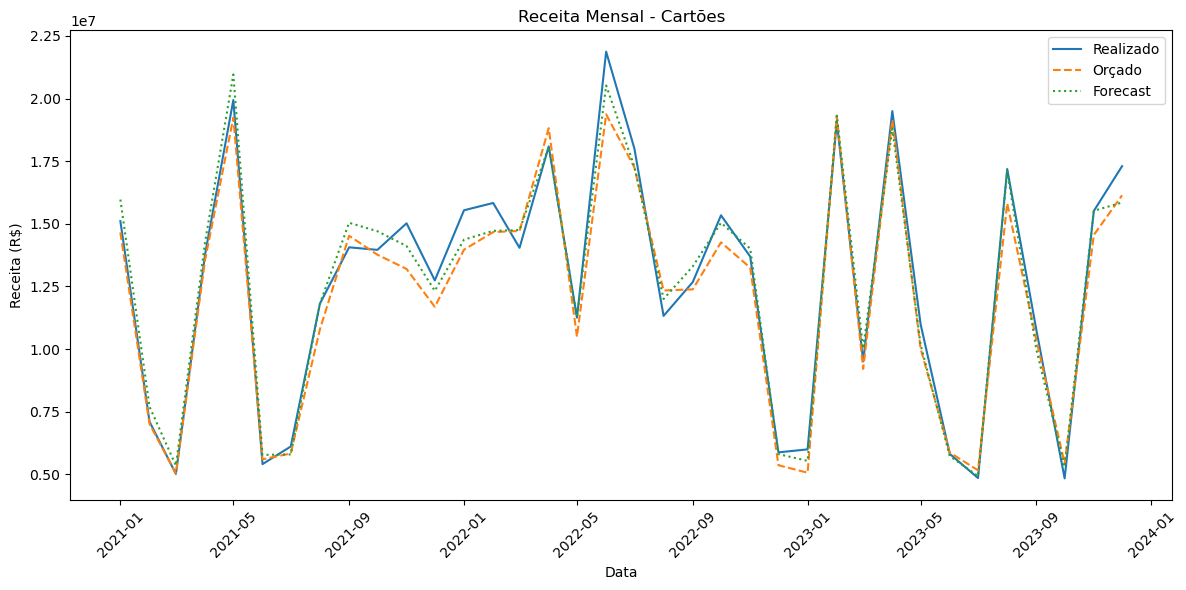

In [36]:

#Convertendo a coluna 'Data' para o formato datetime
df['Data'] = pd.to_datetime(df['Data'])

#Calculando a receita total por produto
receita_produto = df.groupby('Produto')['Receita_Realizada'].sum().sort_values()

produto_foco = 'Cartões'
df_foco = df[df['Produto'] == produto_foco].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_foco['Data'], df_foco['Receita_Realizada'], label='Realizado')
plt.plot(df_foco['Data'], df_foco['Receita_Orcada'], label='Orçado', linestyle='--')
plt.plot(df_foco['Data'], df_foco['Receita_Forecast'], label='Forecast', linestyle=':')
plt.title(f'Receita Mensal - {produto_foco}')
plt.xlabel('Data')
plt.ylabel('Receita (R$)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
inadimplencia_media = df.groupby('Produto')['Inadimplencia'].mean().sort_values(ascending=False)
print("Inadimplência média por produto (%)")
print(inadimplencia_media)


Inadimplência média por produto (%)
Produto
Câmbio           4.394722
Empréstimos      4.262222
Cartões          4.187222
Investimentos    4.183056
Seguros          3.624167
Name: Inadimplencia, dtype: float64


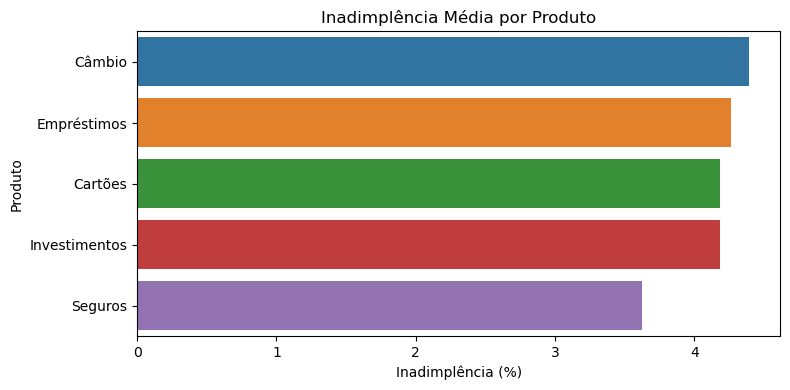

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(x=inadimplencia_media.values, y=inadimplencia_media.index)
plt.title('Inadimplência Média por Produto')
plt.xlabel('Inadimplência (%)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


Conceito FP&A (Financial Planning & Analysis)
ESTUDO PESSOAL: 
FP&A é a área que cuida do planejamento financeiro, análise e monitoramento do desempenho econômico de uma empresa. As principais responsabilidades são:

Criar orçamentos (baseline) e forecasts (previsões ajustadas no meio do caminho), forecast é uma previsão atualizada da receita para um periodo futuro, diferente do orçado, que é planejado no inicio do ano, o forecast é ajustado ao longo do tempo com base em dados reais e novas informacoes, por exemplo, em Janeiro o banco planeja que em março vai captar 100mil, em fevereiro, com algumas mudanças ele percebe que pode vender 110 mil em março (forescat) e no final ele realiza 108mil, ou seja, fotecast é a melhor estimativa atualizada do que vai acontecer, bsaeline, e durante o ano, com novas mudanças de cenarios temos o forecast incremental;

Monitorar o resultado real (realizado) e compará-lo com o orçado e forecast;

Analisar e explicar desvios;

Preparar relatórios e dashboards para a diretoria;

Dar suporte a decisões estratégicas baseadas em dados;

Analisar KPIs financeiros importantes como receita, custo, margem, inadimplência e outros indicadores que mostram a saúde financeira e operacional;

Trabalhar junto com áreas de negócio para melhorar a rentabilidade e eficiência.

In [42]:
acuracia_media = df.groupby('Produto')['Acuracia_Forecast_%'].mean().sort_values()
print("Acurácia média do forecast por produto (%):")
print(acuracia_media)

#QUANTO MAIS PROXIMO DE 100 MELHOR



Acurácia média do forecast por produto (%):
Produto
Empréstimos      94.745169
Câmbio           94.765983
Seguros          95.072589
Cartões          95.456521
Investimentos    95.535342
Name: Acuracia_Forecast_%, dtype: float64


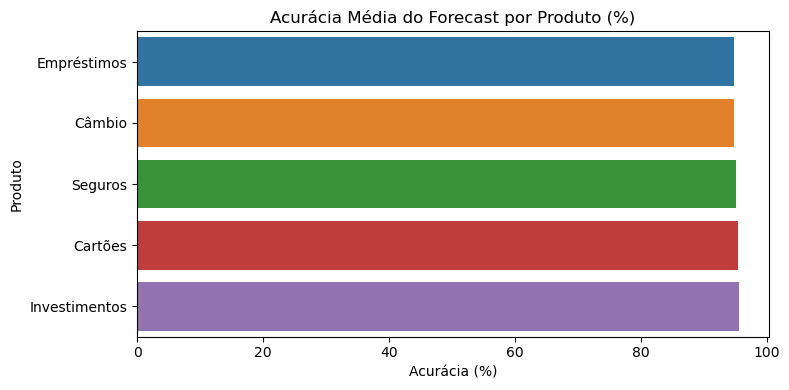

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x=acuracia_media.values, y=acuracia_media.index)
plt.title('Acurácia Média do Forecast por Produto (%)')
plt.xlabel('Acurácia (%)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


In [51]:
# Criar uma coluna com mês e ano formatado (ex: Jan 2023)
df['Mes_Ano'] = df['Data'].dt.strftime('%b %Y')

# Calcular o desvio absoluto
df['Desvio_Abs'] = abs(df['Receita_Realizada'] - df['Receita_Orcada'])

# Agrupar por mês/ano formatado e somar desvios
top_meses = df.groupby('Mes_Ano')['Desvio_Abs'].sum().sort_values(ascending=False).head(5)

print("Top 5 meses com maior desvio absoluto entre Realizado e Orçado:")
print(top_meses)



Top 5 meses com maior desvio absoluto entre Realizado e Orçado:
Mes_Ano
Dec 2021    9466809.07
Jul 2022    5530502.90
Mar 2022    5261000.52
Feb 2022    5000894.68
Aug 2022    4911946.18
Name: Desvio_Abs, dtype: float64


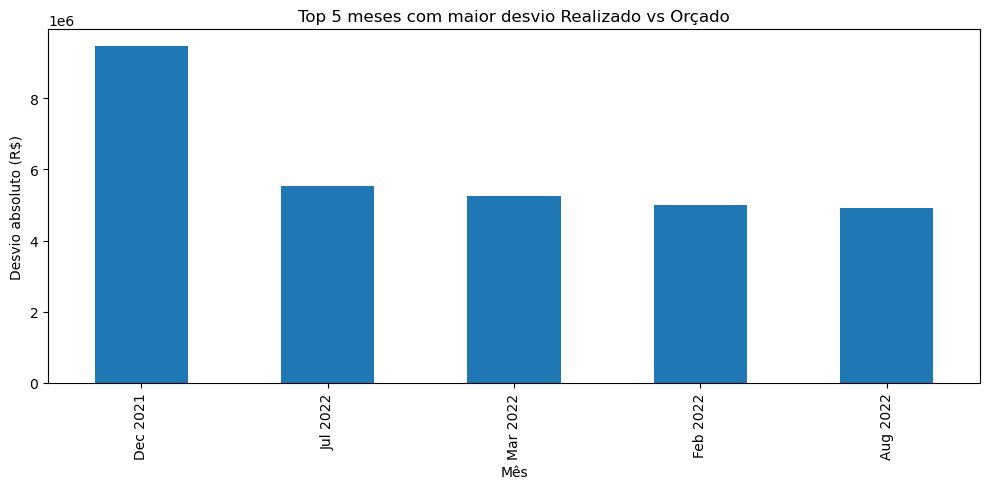

In [52]:
plt.figure(figsize=(10, 5))
top_meses.plot(kind='bar')
plt.title('Top 5 meses com maior desvio Realizado vs Orçado')
plt.ylabel('Desvio absoluto (R$)')
plt.xlabel('Mês')
plt.tight_layout()
plt.show()


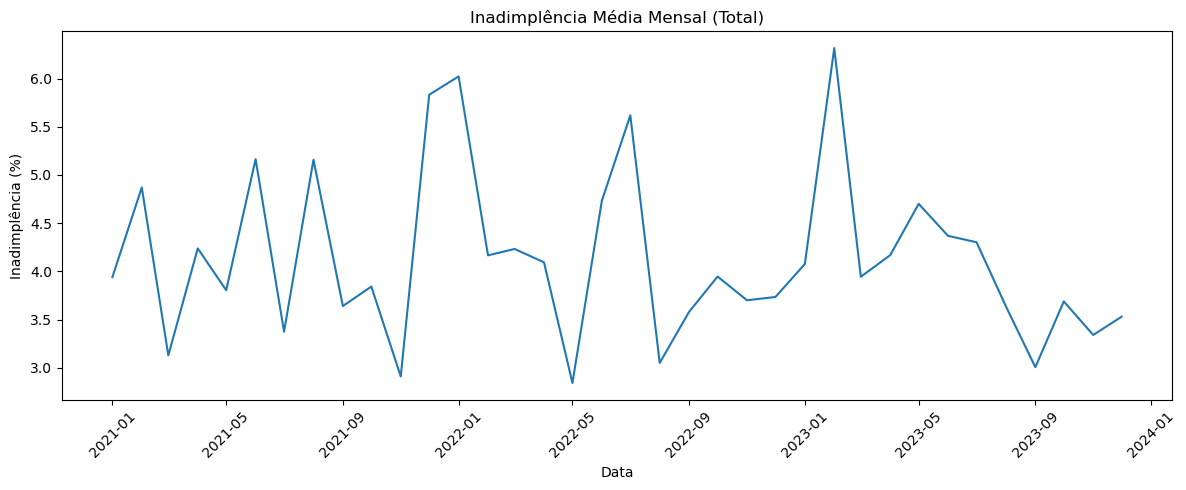

In [45]:
inadimplencia_mensal = df.groupby('Data')['Inadimplencia'].mean()

plt.figure(figsize=(12, 5))
plt.plot(inadimplencia_mensal.index, inadimplencia_mensal.values)
plt.title('Inadimplência Média Mensal (Total)')
plt.xlabel('Data')
plt.ylabel('Inadimplência (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


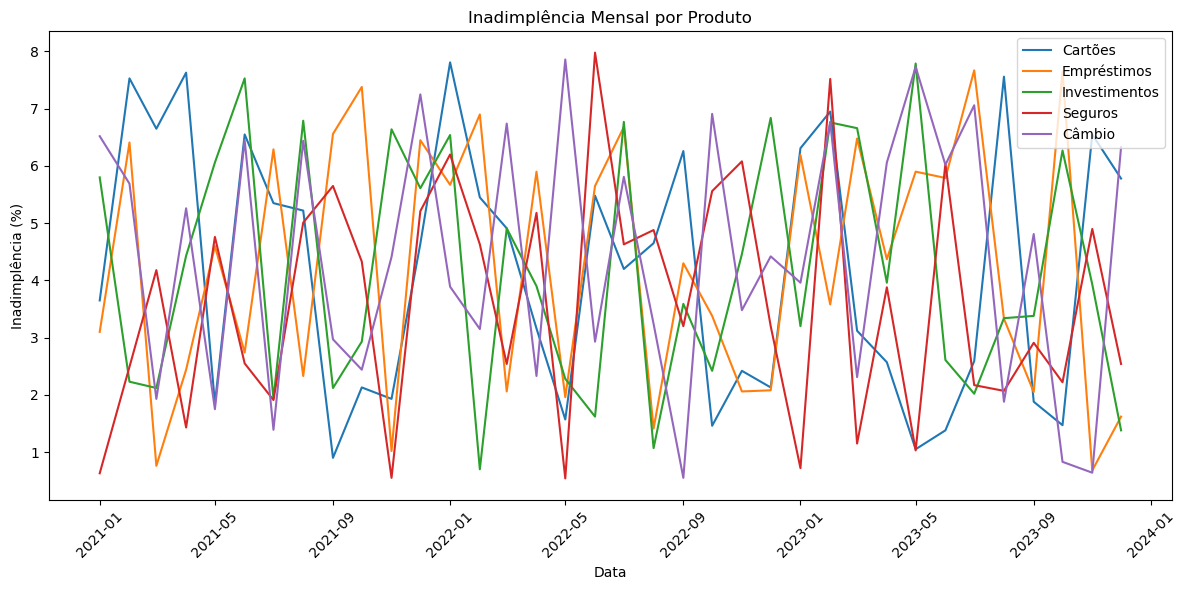

In [46]:
produtos = df['Produto'].unique()
plt.figure(figsize=(12, 6))
for produto in produtos:
    df_prod = df[df['Produto'] == produto]
    inadim = df_prod.groupby('Data')['Inadimplencia'].mean()
    plt.plot(inadim.index, inadim.values, label=produto)
plt.title('Inadimplência Mensal por Produto')
plt.xlabel('Data')
plt.ylabel('Inadimplência (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


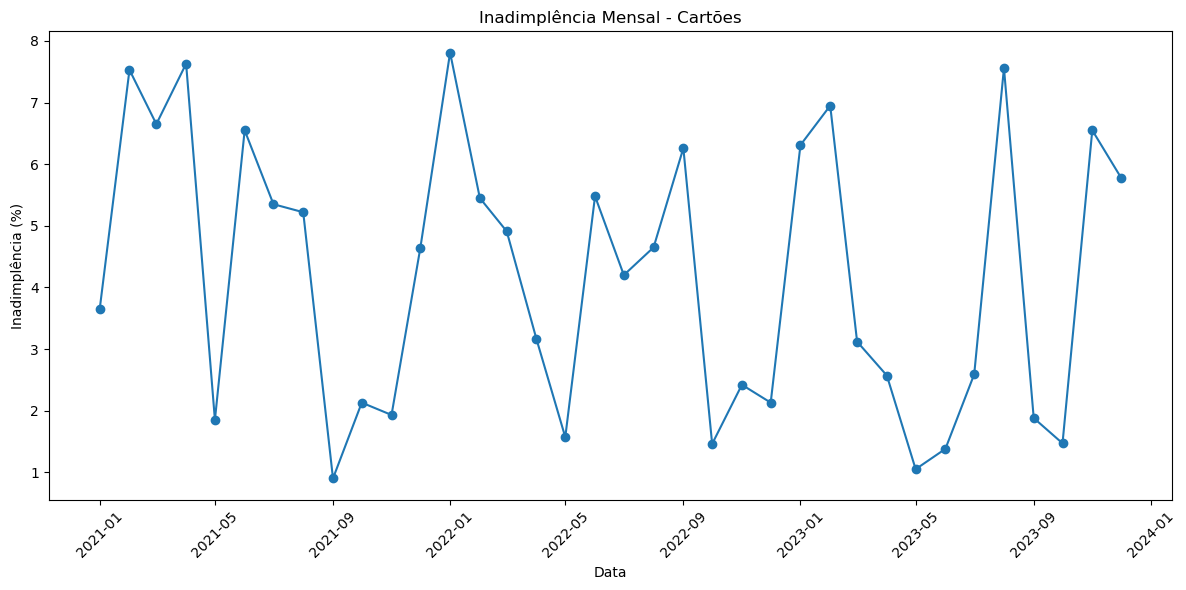

In [53]:
produto_foco = 'Cartões'
df_cartoes = df[df['Produto'] == produto_foco]
inadimplencia_cartoes = df_cartoes.groupby('Data')['Inadimplencia'].mean()

plt.figure(figsize=(12, 6))
plt.plot(inadimplencia_cartoes.index, inadimplencia_cartoes.values, marker='o')
plt.title('Inadimplência Mensal - Cartões')
plt.xlabel('Data')
plt.ylabel('Inadimplência (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Margem média por produto (%):
Produto
Investimentos    60.225908
Câmbio           57.971174
Seguros          57.002984
Empréstimos      56.857081
Cartões          56.506423
Name: margem_pct, dtype: float64


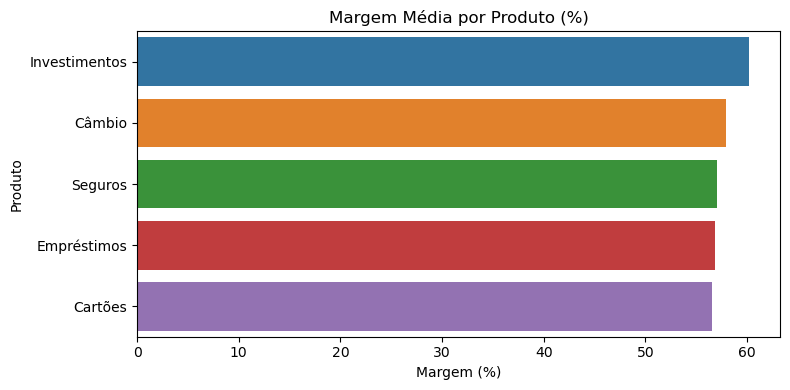

In [48]:
margem_media = df.groupby('Produto')['margem_pct'].mean().sort_values(ascending=False)
print("Margem média por produto (%):")
print(margem_media)

plt.figure(figsize=(8, 4))
sns.barplot(x=margem_media.values, y=margem_media.index)
plt.title('Margem Média por Produto (%)')
plt.xlabel('Margem (%)')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()


In [50]:
resumo_produtos = df.groupby('Produto').agg({
    'Receita_Realizada': 'sum',
    'Receita_Orcada': 'sum',
    'Receita_Forecast': 'sum',
    'Inadimplencia': 'mean',
    'margem_pct': 'mean',
    'Acuracia_Forecast_%': 'mean'
}).reset_index()

print(resumo_produtos)


         Produto  Receita_Realizada  Receita_Orcada  Receita_Forecast  \
0        Cartões       4.549543e+08    4.378418e+08      4.531946e+08   
1         Câmbio       4.256113e+08    4.131556e+08      4.282988e+08   
2    Empréstimos       4.918326e+08    4.789295e+08      4.870052e+08   
3  Investimentos       4.588127e+08    4.470089e+08      4.578399e+08   
4        Seguros       4.824781e+08    4.835085e+08      4.927964e+08   

   Inadimplencia  margem_pct  Acuracia_Forecast_%  
0       4.187222   56.506423            95.456521  
1       4.394722   57.971174            94.765983  
2       4.262222   56.857081            94.745169  
3       4.183056   60.225908            95.535342  
4       3.624167   57.002984            95.072589  
